# Random Forest

# Data Preparation

In [ ]:
# This dataset contains following columns:

# pregnancies - number of times pregnant
# glucose - plasma glucose concentration a 2 hours in an oral glucose tolerance test
# pressure - diastolic blood pressure (mm Hg)
# skin - triceps skinfold thickness (mm)
# insulin - 2-Hour serum insulin (mu U/ml)
# bmi - Body mass index (weight in kg/(height in m)^2)
# pedigre - Diabetes pedigree function
# age - Age (years)
# class - Class variable (0 - healthy or 1 - diabetic)

In [1]:
#@title Data load from GitHub
# Load a csv file from GitHub by coping a raw csv link
import numpy as np
import pandas as pd
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
headernames = ['pregnancies', 'glucose', 'pressure', 'skin', 'insulin', 'bmi', 'pedigre', 'age', 'class']
df = pd.read_csv(url, names=headernames)
df.shape

(768, 9)

In [2]:
#@title Checking data
# First 5 rows
df.head()

,pregnancies,glucose,pressure,skin,insulin,bmi,pedigre,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   pressure     768 non-null    int64  
 3   skin         768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   pedigre      768 non-null    float64
 7   age          768 non-null    int64  
 8   class        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Checking class balance
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [ ]:
# Checking null values
df.isnull().any()

pregnancies    False
glucose        False
pressure       False
skin           False
insulin        False
bmi            False
pedigre        False
age            False
class          False
dtype: bool

In [4]:
#@title Data cleaning

# Changing suspicious 0 values with NaN
df[['glucose', 'pressure', 'skin', 'insulin', 'bmi']] = df[['glucose', 'pressure', 'skin', 'insulin', 'bmi']].replace(0, np.NaN)
df.head()

,pregnancies,glucose,pressure,skin,insulin,bmi,pedigre,age,class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [5]:
# Checking NaN values
df.isnull().sum()

pregnancies      0
glucose          5
pressure        35
skin           227
insulin        374
bmi             11
pedigre          0
age              0
class            0
dtype: int64

In [7]:
# When categorical variables have a small number of missing values, the missing values are replaced by the 'majority class' (the dominant value).

# Numeric variables have a small number of missing values: 
## (Alternative 1) The missing values can be replaced by the average value of the variable on a subset of instances
## that are the closest (the most similar) to the instance(s) with the missing value.
## If the variable is normaly distributed (e.g., shapiro.test()) -> the mean is used; otherwise, the median is used.
## In the simplest case, the entire range of instances is used.

## (Alternative 2) Linear regression can be used to PREDICT the missing values, 
## and replace the missing values with the predicted ones.

## (Alternative 3) The missing values can be replaced with non-NaN values from a subset of SIMILAR observations 
## (similar in terms of having (nearly) the same values of other relevant features). 
## The replacements typically go one by one, so the number of NaNs should be very small.

# Variables with many missing values and/or missing values that are difficult to replace
## Such cases require a more sophisticated imputation, i.e., prediction of good substitutes for the missing values.
## The other option is to create some new variables ("proxies") and do some feature engineering.

# Checking normality
from scipy.stats import shapiro

# Columns with missing values
columns = ['glucose', 'pressure', 'skin', 'insulin', 'bmi']

# Dataframe without NaN
df_temp = df.dropna()

# Replacing missing values with the mean or meadian value of the variable depending on the normality test
for i in columns:    
    print(i)
    # normality test
    stat, p = shapiro(df_temp[i])
    print('\n(W)= %e,\n p = %e' % ( stat, p ))

    # Replacing NaN    
    if p > 0.05:
        df[i].fillna(df[i].mean(), inplace=True)
        print('\nSample looks Gaussian\n')
    else:
        df[i].fillna(df[i].median(), inplace=True)
        print('\nSample does not look Gaussian\n')

glucose

(W)= 9.696221e-01,
 p = 1.523899e-11

Sample does not look Gaussian

pressure

(W)= 9.878173e-01,
 p = 5.258396e-06

Sample does not look Gaussian

skin

(W)= 9.278418e-01,
 p = 9.480331e-19

Sample does not look Gaussian

insulin

(W)= 6.415118e-01,
 p = 3.371231e-37

Sample does not look Gaussian

bmi

(W)= 9.794445e-01,
 p = 6.443597e-09

Sample does not look Gaussian



In [8]:
df.head()

,pregnancies,glucose,pressure,skin,insulin,bmi,pedigre,age,class
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [9]:
# Checking NaN values
df.isnull().sum()

pregnancies    0
glucose        0
pressure       0
skin           0
insulin        0
bmi            0
pedigre        0
age            0
class          0
dtype: int64

In [10]:
#@title Splitting data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Spliting x axis and y axis
y = df['class']

x = df.drop(['class'],axis=1)

# Splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

x_test.shape,y_test.shape

((154, 8), (154,))

In [11]:
#@title Balancing data
# Oversampling is used to balance the unabalanced dataset.

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Oversampling
over_sampler = RandomOverSampler(random_state=42)
x_train, y_train = over_sampler.fit_resample(x_train, y_train)
print(f"Training target statistics: {Counter(y_train)}")

Training target statistics: Counter({1: 393, 0: 393})


# Random Forest Classifier




In [17]:
#@title Random Forest 1 - Default parameters
from sklearn.ensemble import RandomForestClassifier

# Initializing Random Forest
# n_estimators - the default number of estimators is 10.
# max_depth - the deafult is 'none', which means  that the trees are left to expand completely.
rf1 = RandomForestClassifier(random_state=0)

# Fitting the model with the resempled x,y
rf1 = rf1.fit(x_train,y_train)

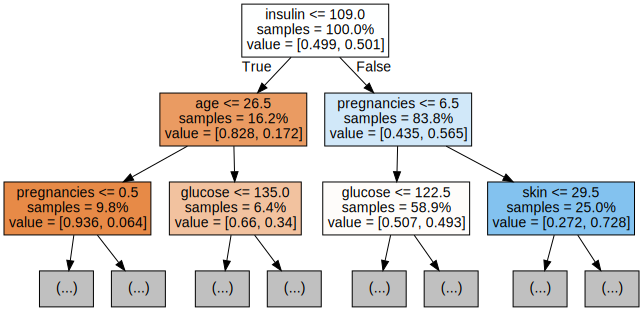

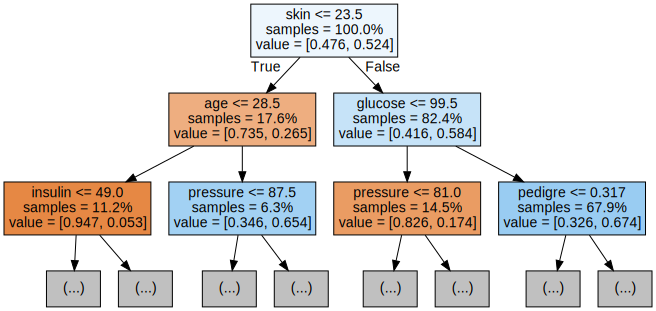

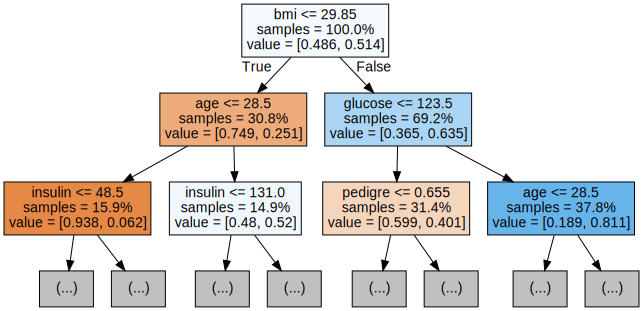

In [18]:
#@title Random Forest 1 Visualization
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Exporting and visualizing partially the first three decision trees from the forest
for i in range(3):
    tree = rf1.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [19]:
#@title Random Forest 1 Evaluation
from sklearn.metrics import confusion_matrix

# Predicting a class / outcome using test data
y_pred1 = rf1.predict(x_test)

# Calculating confusion matrix
confusion_matrix(y_test, y_pred1)

array([[88, 19],
       [11, 36]])

In [20]:
# Accuracy
rf1_accuracy = metrics.accuracy_score(y_test, y_pred1)

# Precision
rf1_precision = metrics.precision_score(y_test, y_pred1)

# Recall
rf1_recall = metrics.recall_score(y_test, y_pred1)

# F1
rf1_f1 = metrics.f1_score(y_test, y_pred1)

print("RF1 accuracy: ", rf1_accuracy,
      "\nRF1 precision: ", rf1_precision,
      "\nRF1 recall: ", rf1_recall,
      "\nRF1 F1: ", rf1_f1)

RF1 accuracy:  0.8051948051948052 
RF1 precision:  0.6545454545454545 
RF1 recall:  0.7659574468085106 
RF1 F1:  0.7058823529411765


In [21]:
# Getting feature importances
rf1.feature_importances_

array([0.08165807, 0.228228  , 0.07978695, 0.07375584, 0.09671475,
       0.16360377, 0.11856402, 0.1576886 ])

<BarContainer object of 8 artists>

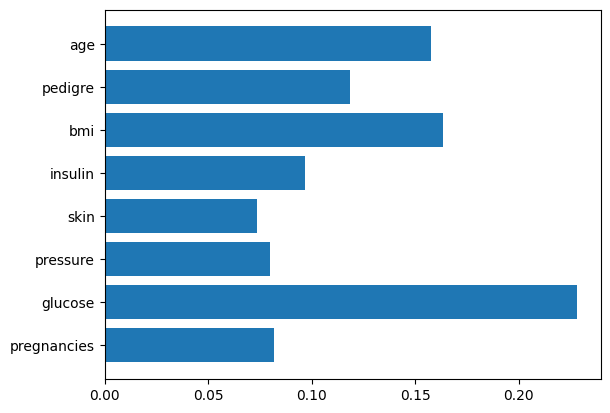

In [22]:
# Feature importances chart
from matplotlib import pyplot as plt
plt.barh(rf1.feature_names_in_, rf1.feature_importances_)

In [27]:
#@title Random Forest 2 - RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# A dictionary of multiple possible values for parameters (hyperparameter space)
# N_estimators: The number of decision trees in the forest. The default number of estimators in Scikit-Learn is 10.
# Max_depth: This hyperparameter represents the maximum level of each tree in the random forest model.
  ## A deeper tree performs well and captures a lot of information about the training data,
  ## but will not generalize well to test data. By default, this value is set to “None”
  ## in the Scikit-Learn library, which means that the trees are left to expand completely.
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Initializing a Random Forest
rf_temp = RandomForestClassifier(random_state=0)

# Randomized search is used to find the best hyperparameters. This function also uses cross-validation (CV), 
# which means it splits the data into n equal-sized groups and uses n-1 to train and 1 to test the result. 
# It will loop through each group and give an accuracy score if a scoring system was not passed to the function, 
# or another score if specified, which is averaged to find the best model.
rand_search = RandomizedSearchCV(rf_temp, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=15,
                                 scoring='accuracy')

# Fit the random search object to the resampled data
rand_search_fit = rand_search.fit(x_train,y_train)

In [28]:
# Creating a variable for the best model
rf2 = rand_search_fit.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search_fit.best_params_)

Best hyperparameters: {'max_depth': 17, 'n_estimators': 485}


In [29]:
#@title Random Forest 2 Evaluation
from sklearn.metrics import confusion_matrix

# Predicting a class / outcome using test data
y_pred2 = rf2.predict(x_test)

# Calculating confusion matrix
confusion_matrix(y_test, y_pred2)

array([[89, 18],
       [13, 34]])

In [30]:
# Accuracy
rf2_accuracy = metrics.accuracy_score(y_test, y_pred2)

# Precision
rf2_precision = metrics.precision_score(y_test, y_pred2)

# Recall
rf2_recall = metrics.recall_score(y_test, y_pred2)

# F1
rf2_f1 = metrics.f1_score(y_test, y_pred2)

print("RF2 accuracy: ", rf2_accuracy,
      "\nRF2 precision: ", rf2_precision,
      "\nRF2 recall: ", rf2_recall,
      "\nRF2 F1: ", rf2_f1)

RF2 accuracy:  0.7987012987012987 
RF2 precision:  0.6538461538461539 
RF2 recall:  0.723404255319149 
RF2 F1:  0.6868686868686869


In [32]:
#@title Random Forest 3 - GridSearchCV
from sklearn.model_selection import GridSearchCV

# A dictionary of multiple possible values for parameters (hyperparameter space)
# N_estimators: The number of decision trees in the forest. The default number of estimators in Scikit-Learn is 10.
# Max_depth: This hyperparameter represents the maximum level of each tree in the random forest model.
# Max_features: The maximum number of features that the random forest model is allowed to try at each split.
  ## By default in Scikit-Learn, this value is set to the square root of the total number of variables in the dataset.
# Min_samples_leaf: The minimum number of samples required to be at the leaf node of each tree. The default value is 1 in Scikit-Learn.
# Min_samples_split: The minimum number of samples required to split an internal node of each tree. The default value is 2 in Scikit-Learn.

grid_space={'max_depth':[3,5,10],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[2,3],
              'min_samples_split':[2,3]
           }

# Initializing a Random Forest
rf_temp = RandomForestClassifier(random_state=0)

# Grid search is used to find the best hyperparameters.
# The GridSearchCV is the process of performing hyperparameter tuning in order to
  ## determine the optimal values for a given model. 
# GridSearchCV tries all the combinations of the values passed in the dictionary
  ## and evaluates the model for each combination using the Cross-Validation method
grid = GridSearchCV(rf_temp,param_grid=grid_space,cv=3,scoring='accuracy')
grid_fit = grid.fit(x_train,y_train)

In [33]:
# Creating a variable for the best model
rf3 = grid_fit.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  grid_fit.best_params_)

Best hyperparameters: {'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [34]:
#@title Random Forest 3 Evaluation
from sklearn.metrics import confusion_matrix

# Predicting a class / outcome using test data
y_pred3 = rf3.predict(x_test)

# Calculating confusion matrix
confusion_matrix(y_test, y_pred3)

array([[87, 20],
       [12, 35]])

In [35]:
# Accuracy
rf3_accuracy = metrics.accuracy_score(y_test, y_pred3)

# Precision
rf3_precision = metrics.precision_score(y_test, y_pred3)

# Recall
rf3_recall = metrics.recall_score(y_test, y_pred3)

# F1
rf3_f1 = metrics.f1_score(y_test, y_pred3)

print("RF3 accuracy: ", rf3_accuracy,
      "\nRF3 precision: ", rf3_precision,
      "\nRF3 recall: ", rf3_recall,
      "\nRF3 F1: ", rf3_f1)

RF3 accuracy:  0.7922077922077922 
RF3 precision:  0.6363636363636364 
RF3 recall:  0.7446808510638298 
RF3 F1:  0.6862745098039216


<BarContainer object of 8 artists>

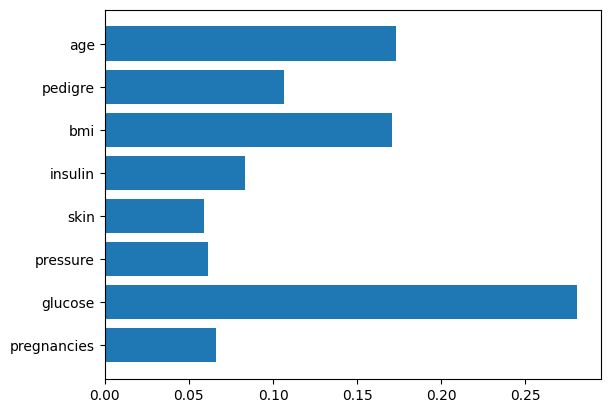

In [36]:
# Feature importances chart
from matplotlib import pyplot as plt
plt.barh(rf1.feature_names_in_, rf3.feature_importances_)

In [37]:
#@title Decision Tree 4 - Selected features
# Spliting x axis and y axis

y = df['class']

# Dropping feature that were not shown significant in Decision Tree 1
x_new = df.drop(['class','pedigre','skin','pressure'],axis=1)

# Splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 0)

x_test.shape,y_test.shape

((154, 5), (154,))

In [38]:
# Oversampling is used to balance the unabalanced dataset.

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Oversampling
over_sampler = RandomOverSampler(random_state=42)
x_train, y_train = over_sampler.fit_resample(x_train, y_train)
print(f"Training target statistics: {Counter(y_train)}")

Training target statistics: Counter({1: 393, 0: 393})


In [40]:
# Initializing Random Forest
rf4 = RandomForestClassifier(random_state=0)

# Fitting the model with the resempled x,y
rf4 = rf4.fit(x_train,y_train)

In [41]:
#@title Random Forest 4 Evaluation
from sklearn.metrics import confusion_matrix

# Predicting a class / outcome using test data
y_pred4 = rf4.predict(x_test)

# Calculating confusion matrix
confusion_matrix(y_test, y_pred4)

array([[89, 18],
       [14, 33]])

In [42]:
# Accuracy
rf4_accuracy = metrics.accuracy_score(y_test, y_pred4)

# Precision
rf4_precision = metrics.precision_score(y_test, y_pred4)

# Recall
rf4_recall = metrics.recall_score(y_test, y_pred4)

# F1
rf4_f1 = metrics.f1_score(y_test, y_pred4)

print("RF4 accuracy: ", rf4_accuracy,
      "\nRF4 precision: ", rf4_precision,
      "\nRF4 recall: ", rf4_recall,
      "\nRF4 F1: ", rf4_f1)

RF4 accuracy:  0.7922077922077922 
RF4 precision:  0.6470588235294118 
RF4 recall:  0.7021276595744681 
RF4 F1:  0.673469387755102


In [43]:
#@title Random Forest 5 - Class Weighting
# Spliting x axis and y axis
y = df['class']
x = df.drop(['class'],axis=1)

# Splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

x_test.shape,y_test.shape

((154, 8), (154,))

In [44]:
# Initializing Random Forest
# A simple technique for modifying a decision tree for imbalanced classification
  ## is to change the weight that each class has when calculating the “impurity” score
  ## of a chosen split point.
rf5 = RandomForestClassifier(class_weight='balanced', random_state=0)

# Fitting the model with the resempled x,y
rf5 = rf5.fit(x_train,y_train)

In [45]:
#@title Random Forest 5 Evaluation

# Predicting a class / outcome using test data
y_pred5 = rf5.predict(x_test)

# Calculating confusion matrix
confusion_matrix(y_test, y_pred5)

array([[94, 13],
       [17, 30]])

In [46]:
# Accuracy
rf5_accuracy = metrics.accuracy_score(y_test, y_pred5)

# Precision
rf5_precision = metrics.precision_score(y_test, y_pred5)

# Recall
rf5_recall = metrics.recall_score(y_test, y_pred5)

# F1
rf5_f1 = metrics.f1_score(y_test, y_pred5)

print("RF5 accuracy: ", rf5_accuracy,
      "\nRF5 precision: ", rf5_precision,
      "\nRF5 recall: ", rf5_recall,
      "\nRF5 F1: ", rf5_f1)

RF5 accuracy:  0.8051948051948052 
RF5 precision:  0.6976744186046512 
RF5 recall:  0.6382978723404256 
RF5 F1:  0.6666666666666666


In [47]:
#@title Random Forest 6 - Bootstrap Class Weighting
# Spliting x axis and y axis
y = df['class']
x = df.drop(['class'],axis=1)

# Splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

x_test.shape,y_test.shape

((154, 8), (154,))

In [48]:
# Given that each decision tree is constructed from a bootstrap sample
  ## (e.g. random selection with replacement), the class distribution in the data sample
  ## will be different for each tree.
# It is possible to do the class weighting based on the class distribution in each bootstrap sample,
  ## instead of the entire training dataset.
# This can be achieved by setting the class_weight argument to the value ‘balanced_subsample‘.

# Initializing Random Forest
rf6 = RandomForestClassifier(class_weight='balanced_subsample', random_state=0)

# Fitting the model with the resempled x,y
rf6 = rf6.fit(x_train,y_train)

In [49]:
#@title Random Forest 6 Evaluation

# Predicting a class / outcome using test data
y_pred6 = rf6.predict(x_test)

# Calculating confusion matrix
confusion_matrix(y_test, y_pred6)

array([[93, 14],
       [17, 30]])

In [50]:
# Accuracy
rf6_accuracy = metrics.accuracy_score(y_test, y_pred6)

# Precision
rf6_precision = metrics.precision_score(y_test, y_pred6)

# Recall
rf6_recall = metrics.recall_score(y_test, y_pred6)

# F1
rf6_f1 = metrics.f1_score(y_test, y_pred6)

print("RF6 accuracy: ", rf6_accuracy,
      "\nRF6 precision: ", rf6_precision,
      "\nRF6 recall: ", rf6_recall,
      "\nRF6 F1: ", rf6_f1)

RF6 accuracy:  0.7987012987012987 
RF6 precision:  0.6818181818181818 
RF6 recall:  0.6382978723404256 
RF6 F1:  0.6593406593406593


In [51]:
#@title Comparison of metrics

df_compare = pd.DataFrame([(rf1_accuracy, rf2_accuracy, rf3_accuracy, rf4_accuracy, rf5_accuracy, rf6_accuracy),
                           (rf1_precision, rf2_precision, rf3_precision, rf4_precision, rf5_precision, rf6_precision),
                           (rf1_recall, rf2_recall, rf3_recall, rf4_recall, rf5_recall,  rf6_recall),
                           (rf1_f1, rf2_f1, rf3_f1, rf4_f1, rf5_f1, rf6_f1)],
           columns=('RF1 (default params)', 'RF2 (rendomized search)', 'RF3 (grid search)',
                    'RF4 (RF1, selected features)', 'RF5 (class weighting)', 'RF6 (bootstrap class weighting)'),
           index=('Accuracy', 'Precision', 'Recall', 'F1')
                 )

df_compare.head()

,RF1 (default params),RF2 (rendomized search),RF3 (grid search),"RF4 (RF1, selected features)",RF5 (class weighting),RF6 (bootstrap class weighting)
Accuracy,0.805195,0.798701,0.792208,0.792208,0.805195,0.798701
Precision,0.654545,0.653846,0.636364,0.647059,0.697674,0.681818
Recall,0.765957,0.723404,0.744681,0.702128,0.638298,0.638298
F1,0.705882,0.686869,0.686275,0.673469,0.666667,0.659341


In [52]:
#@title Evaluation based on 'Mean ROC AUC'
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

# Spliting x axis and y axis
y = df['class']
x = df.drop(['class'],axis=1)

# Splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

x_train.shape,y_train.shape

((614, 8), (614,))

In [53]:
# Oversampling is used to balance the unabalanced dataset.

# Oversampling
over_sampler1 = RandomOverSampler(random_state=42)
x_train_over, y_train_over = over_sampler1.fit_resample(x_train, y_train)
print(f"Training target statistics: {Counter(y_train_over)}")

Training target statistics: Counter({1: 393, 0: 393})


In [54]:
# RepeatedStratifiedKFold allows evaluating the estimated performance of a machine learning model,
  ## by simply repeating the cross-validation procedure multiple times (according to the n_repeats value),
  ## and reporting the mean result across all folds from all runs. This mean result
  ## is expected to be a more accurate estimate of the model's performance

# Defining evaluation procedure
# If, for example, 5 repeats (i.e., n_repeats=5) of 10-fold cross-validation were
  ## used for estimating the model's performance, it means that 50 different models
  ## would need to be fitted (trained) and evaluated.
# n_jobs: Specify the number of cores to use for key machine learning tasks.
  ## n_jobs=None: Use a single core or the default configured by your backend library.
  ## n_jobs=4: Use the specified number of cores, in this case 4.
  ## n_jobs=-1: Use all available cores.
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [55]:
# Initializing Random Forest with deafult parameters
# n_estimators - the default number of estimators is 10.
# max_depth - the deafult is 'none', which means  that the trees are left to expand completely.
rf1_1 = RandomForestClassifier(random_state=0)

# evaluate model
# Cross_val_score is a function in the scikit-learn package which trains and tests
  ## a model over multiple folds of your dataset. This cross validation method gives you
  ## a better understanding of model performance over the whole dataset instead of just a single train/test split.
# The common metrics provided by sklearn are passable as a string into this parameter,
  ## where some typical choices would be:
     ### ‘accuracy’
     ### ‘balanced_accuracy’
     ### ‘roc_auc’
     ### ‘f1’
     ### ‘neg_mean_absolute_error’
     ### ‘neg_root_mean_squared_error’
     ### ‘r2’
rf1_1_scores = cross_val_score(rf1_1, x_train_over, y_train_over, scoring='roc_auc', cv=rskf, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % mean(rf1_1_scores))

Mean ROC AUC: 0.929


In [58]:
# Initializing Random Forest with class weighting
rf5_1 = RandomForestClassifier(class_weight='balanced', random_state=0)

# evaluate model
rf5_1_scores = cross_val_score(rf5_1, x_train, y_train, scoring='roc_auc', cv=rskf, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % mean(rf5_1_scores))

Mean ROC AUC: 0.815


In [59]:
# Initializing Random Forest with bootstrap class weighting
rf6_1 = RandomForestClassifier(class_weight='balanced_subsample', random_state=0)

# evaluate model
rf6_1_scores = cross_val_score(rf6_1, x_train, y_train, scoring='roc_auc', cv=rskf, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % mean(rf6_1_scores))

Mean ROC AUC: 0.815


In [ ]:
# Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure,
# or differences in numerical precision.